In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.cluster import SpectralBiclustering
from src.utils_clustering import visualize_biclusters, evaluate_biclustering, load_labels_from_file

In [23]:
DATASET_FILE_NAME = "s1"
dataset_file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(dataset_file_path)
processed_data.shape

(5000, 2)

In [24]:
# Adjust n_clusters as needed
n_clusters = (15, 2)  # Number of row clusters, number of column clusters

bicluster = SpectralBiclustering(n_clusters=n_clusters, random_state=0)
bicluster.fit(processed_data)

# Extract row and column labels
rows_labels = bicluster.row_labels_
cols_labels = bicluster.column_labels_

In [25]:
len(rows_labels)

5000

In [26]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(rows_labels))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [27]:
clustering_name = 'Spectral_Biclustering_Visualization'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

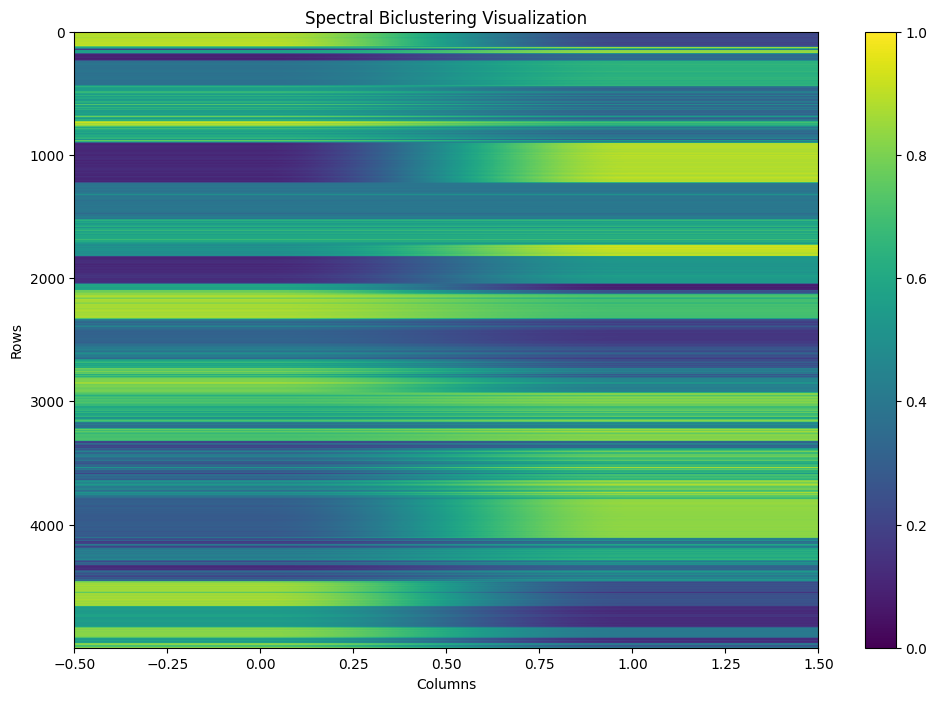

Timestamp: 2024-01-17 13:33:42.765838
Dataset: s1
Clustering Algorithm: Spectral_Biclustering_Visualization
AMI: 0.7139003025979448
Silhouette Score: 0.11109292987353944


In [28]:
visualize_biclusters(processed_data.values, rows_labels, cols_labels, 
                     title='Spectral Biclustering Visualization')
evaluate_biclustering(data=processed_data, labels_true=labels_true, bicluster=bicluster, clustering_name=clustering_name, dataset_name=dataset_name, 
                    results_path=results_path)

Visualizing the results of biclustering using a scatter plot like you did with agglomerative clustering is somewhat challenging and may not be as informative. This is because biclustering operates differently compared to traditional clustering methods like agglomerative clustering.

In traditional clustering, each data point is assigned to one cluster, and a scatter plot can effectively show these assignments. However, biclustering simultaneously clusters rows and columns of the data matrix. This means each data point doesn't belong to a single cluster but instead to a combination of a row cluster and a column cluster. Therefore, a scatter plot may not effectively communicate the complex relationships that biclustering uncovers.

#### Traditional Clustering (like Agglomerative Clustering):

In traditional clustering, each data point is assigned to exactly one cluster.
Metrics like AMI, ARI, Silhouette Score, etc., are designed to evaluate how well data points are grouped into distinct clusters.
These metrics assume each data point belongs to one cluster and compare the clustering results with a ground truth, or evaluate intra-cluster and inter-cluster distances.

#### Biclustering:
In biclustering, clusters are formed by groups of rows and groups of columns simultaneously, creating submatrices or "biclusters."
A data point in biclustering is defined by its row and column, meaning it's part of two clustering dimensions.
Many traditional metrics do not account for this dual membership and can't effectively measure the quality of biclusters.

#### Silhouette Score
The Silhouette Score, for example, can be calculated for either rows or columns, but it will only provide a partial view of the biclustering quality.

#### Consensus Score 

he Consensus Score is a specific metric for biclustering, measuring the stability or similarity of biclusters across different runs or compared to a ground truth. This metric is more suitable for evaluating the quality of biclusters.